<h1 align="center" style="font-weight:bold">AtliQo Bank Credit Card Launch</h1>

### **Problem Statement**

***AtliQo***, a newly launched bank, is introducing its first credit card and aims to identify the ideal target market based on customer demographics and financial behavior.

To evaluate the effectiveness of the new credit card offering, the bank will conduct an **A/B test** to determine whether the **average transaction amount** among customers in the identified target market is significantly higher compared to a control group.

The objective is to assess whether the new credit card **drives greater spending behavior**, thereby informing decisions on **launching it to the identified target group** and **targeted marketing strategies**.

<h2 align="center" style="font-weight:bold">Phase 1: Target Market Identification</h2>

In [1]:
# Import data and dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import locale, os
locale.setlocale(locale.LC_ALL, 'English_India.1252')
pd.options.display.float_format = lambda x: locale.format_string('%0.2f', x, grouping=True)

In [2]:
df_cust = pd.read_csv('Resource/datasets/customers.csv')

In [3]:
df_cs = pd.read_csv('Resource/datasets/credit_profiles.csv')

In [4]:
df_txn = pd.read_csv('Resource/datasets/transactions.csv')

In [5]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,"42,98,532.00",Married
1,2,Anjali Pandey,Female,47,City,Consultant,"7,82,064.00",Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,"2,68,536.00",Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,"4,02,756.00",Married
4,5,Advait Malik,Male,48,City,Consultant,"4,72,872.00",Married


In [6]:
df_cust.shape

(1000, 8)

In [7]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.59,"19,571.00",0.00,"40,000.00"
1,2,587,0.11,"1,61,644.00",2.00,"1,250.00"
2,3,544,0.85,513.00,4.00,"1,000.00"
3,4,504,0.34,224.00,2.00,"1,000.00"
4,5,708,0.59,"18,090.00",2.00,"40,000.00"


In [8]:
df_cs.shape

(1004, 6)

In [9]:
df_txn.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [10]:
df_txn.shape

(500000, 7)

### **Data Cleaning**

#### **Exploring `customer` table**

In [11]:
df_cust.describe()

,cust_id,age,annual_income
count,"1,000.00","1,000.00",950.00
mean,500.50,36.41,"17,49,350.39"
std,288.82,15.67,"12,91,694.78"
min,1.00,1.00,"2,13,024.00"
25%,250.75,26.00,"6,96,204.00"
50%,500.50,32.00,"13,85,772.00"
75%,750.25,46.00,"23,48,313.00"
max,"1,000.00",135.00,"53,92,152.00"


In [12]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [13]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,"42,98,532.00",Married
1,2,Anjali Pandey,Female,47,City,Consultant,"7,82,064.00",Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,"2,68,536.00",Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,"4,02,756.00",Married
4,5,Advait Malik,Male,48,City,Consultant,"4,72,872.00",Married


#### **Analyzing `annual_income` Column**

 **Null Value Treatment**

In [14]:
cols = df_cust['occupation'].unique()

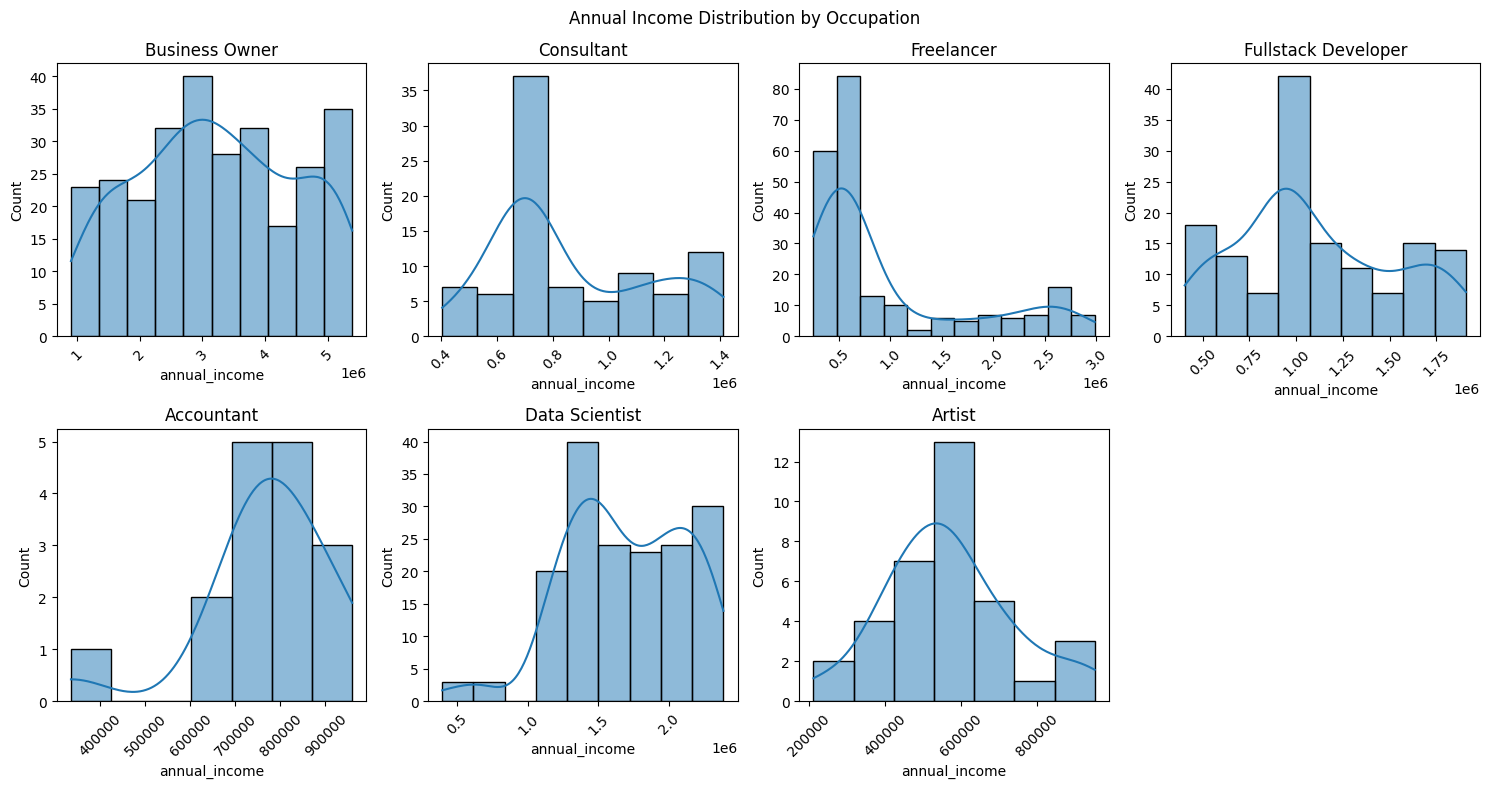

In [15]:
plt.rcParams['figure.figsize'] = [15,8]
for i,col in enumerate(cols,1):
    plt.subplot(2,4,i)
    data=df_cust[df_cust['occupation'] == col]['annual_income']
    sns.histplot(data,kde=1)
    plt.title(col)
    plt.xticks(rotation=45)
plt.suptitle('Annual Income Distribution by Occupation')
plt.tight_layout()
plt.show()

In [16]:
for col in cols:
    skew_value = df_cust[df_cust['occupation'] == col]['annual_income'].skew()
    print(f"Skewness for {col}: {skew_value:.2f}")

Skewness for Business Owner: 0.01
Skewness for Consultant: 0.56
Skewness for Freelancer: 1.29
Skewness for Fullstack Developer: 0.32
Skewness for Accountant: -1.69
Skewness for Data Scientist: -0.40
Skewness for Artist: 0.40


In [17]:
occ_inc_median=df_cust.groupby('occupation')['annual_income'].median().sort_values(ascending = False)
occ_inc_median

occupation
Business Owner        31,35,585.00
Data Scientist        16,29,108.00
Fullstack Developer    9,30,390.00
Accountant             7,83,180.00
Consultant             6,96,204.00
Freelancer             5,61,108.00
Artist                 5,49,528.00
Name: annual_income, dtype: float64

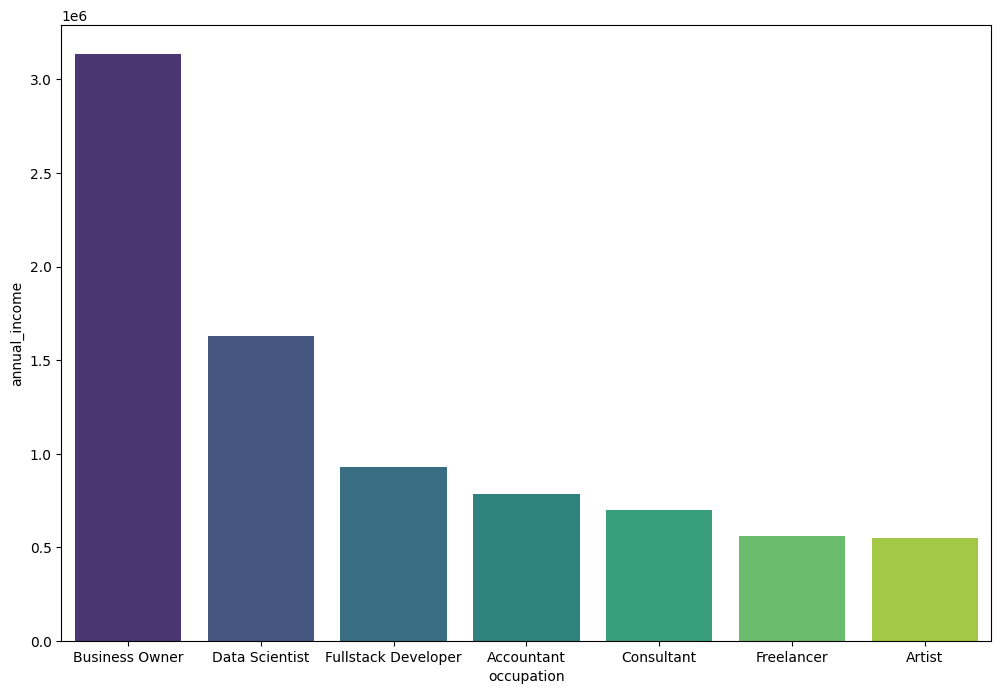

In [18]:
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(occ_inc_median,palette='viridis')
plt.show()

In [19]:
df_cust['annual_income'] = df_cust['annual_income'].fillna(df_cust['occupation'].map(occ_inc_median))

Imputed missing annual income values using the median per occupation, given the skewed distributions—most notably for Freelancer (1.29), Accountant (-1.69), and Data Scientist (-0.40).

In [20]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

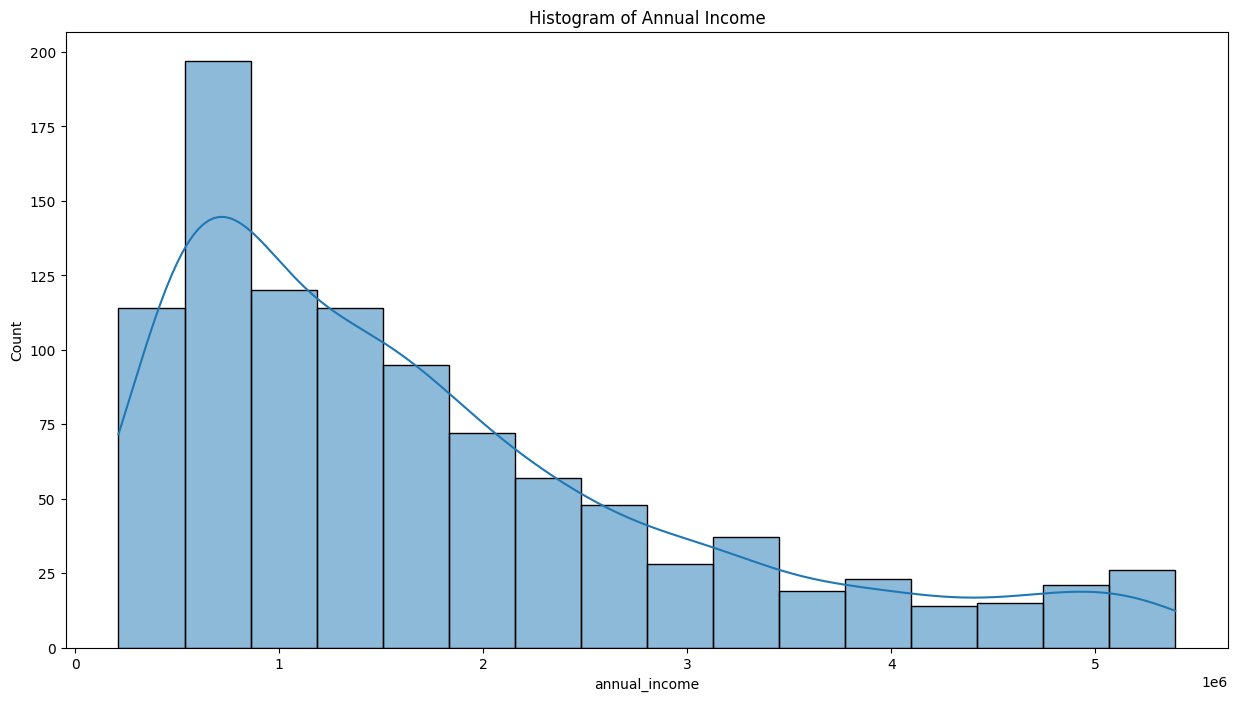

In [21]:
plt.rcParams['figure.figsize']=[15,8]
sns.histplot(df_cust['annual_income'],kde=True)
plt.title('Histogram of Annual Income')
plt.show()

 **Visualization** 

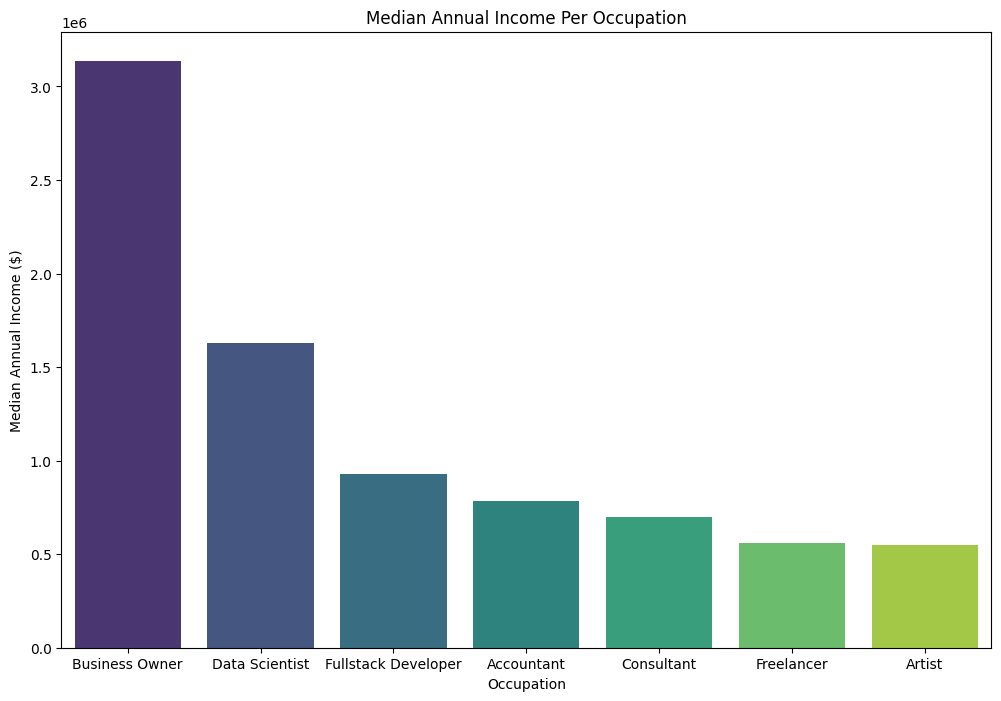

In [22]:
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(occ_inc_median,palette='viridis')
plt.title('Median Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Annual Income ($)')
plt.show()

In [23]:
categorical_columns = ['gender', 'location', 'occupation', 'marital_status']

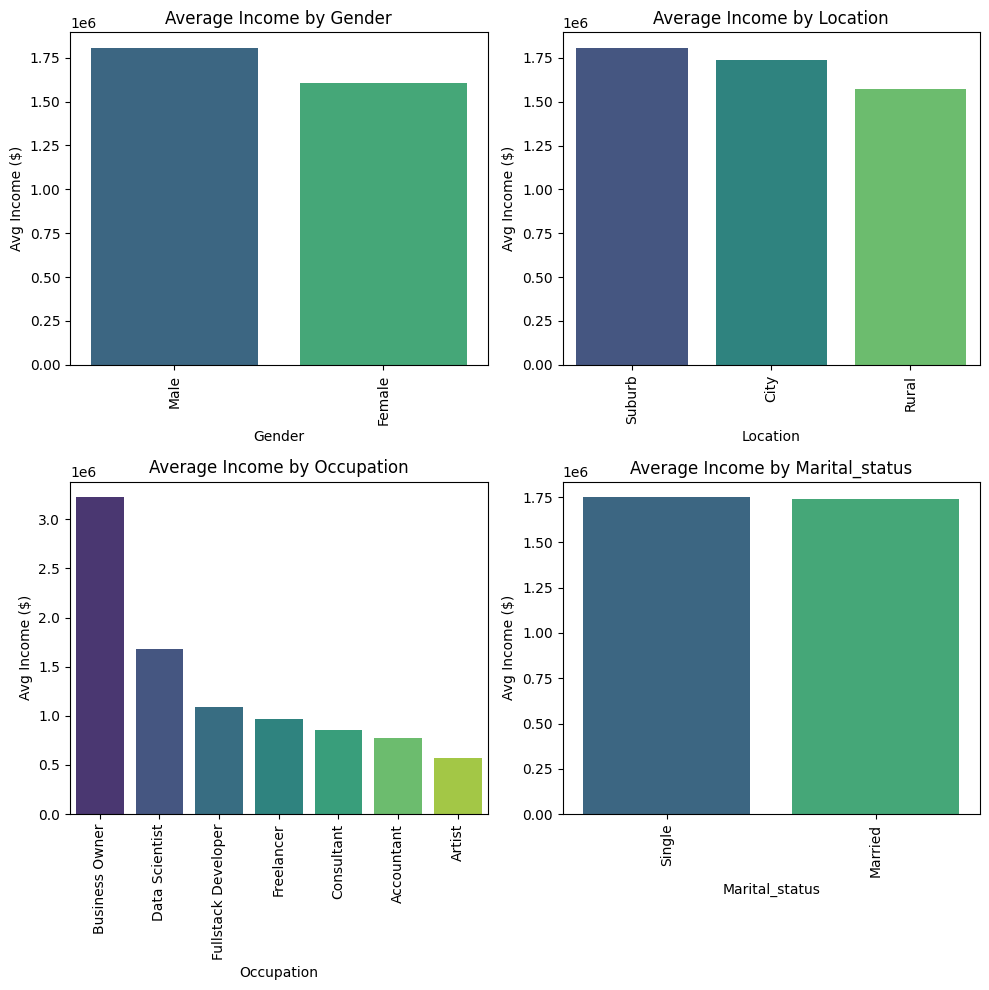

In [24]:
plt.rcParams['figure.figsize'] = [10,10]
for idx, col in enumerate(categorical_columns,1):
    plt.subplot(2,2,idx)
    avg_income_grp = df_cust.groupby(col)['annual_income'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_income_grp.index, y=avg_income_grp.values, palette='viridis')
    plt.title(f'Average Income by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Avg Income ($)')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **Analyzing `age` Column**

In [25]:
df_cust['age'].isnull().sum()

0

**Outlier Treatment**

In [26]:
df_cust['age'].describe()

count   1,000.00
mean       36.41
std        15.67
min         1.00
25%        26.00
50%        32.00
75%        46.00
max       135.00
Name: age, dtype: float64

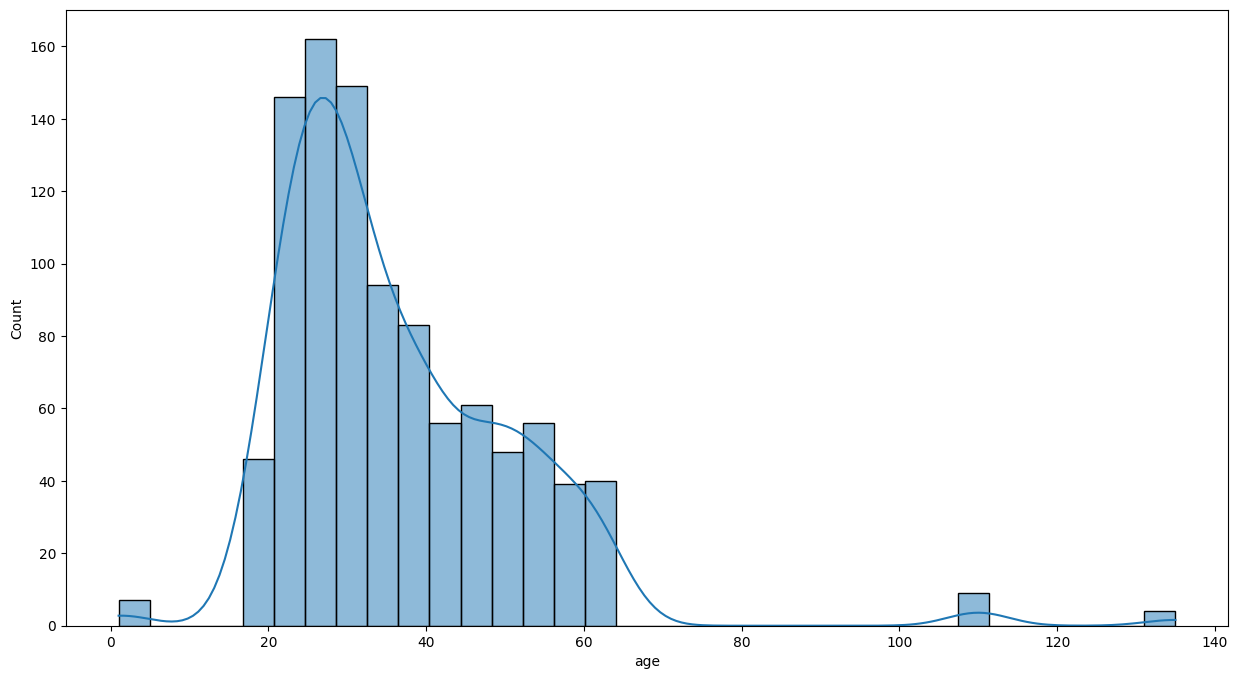

In [27]:
plt.rcParams['figure.figsize']=[15,8]
sns.histplot(df_cust['age'],kde=1)
plt.show()

A person's age is considered valid **only** if it falls within the range of **18 to 80 years** — below 18 is ineligible for credit cards, and above 80 is excluded due to low life expectancy and rarity.


In [28]:
df_cust[(df_cust['age']<18) | (df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,"42,98,532.00",Married
41,42,Aaryan Shah,Male,110,City,Artist,"5,49,528.00",Married
165,166,Sia Dutta,Female,1,City,Freelancer,"4,76,652.00",Single
174,175,Rohan Sharma,Male,110,City,Freelancer,"2,84,676.00",Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,"25,31,844.00",Married
277,278,Aarav Tandon,Male,110,City,Consultant,"11,58,264.00",Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,"6,63,048.00",Married
325,326,Virat Goel,Male,110,City,Accountant,"7,32,252.00",Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,"53,37,312.00",Married
692,693,Dhruv Jha,Male,1,City,Business Owner,"9,96,540.00",Married


In [29]:
df_valid = df_cust[df_cust['age'].between(18, 80)]

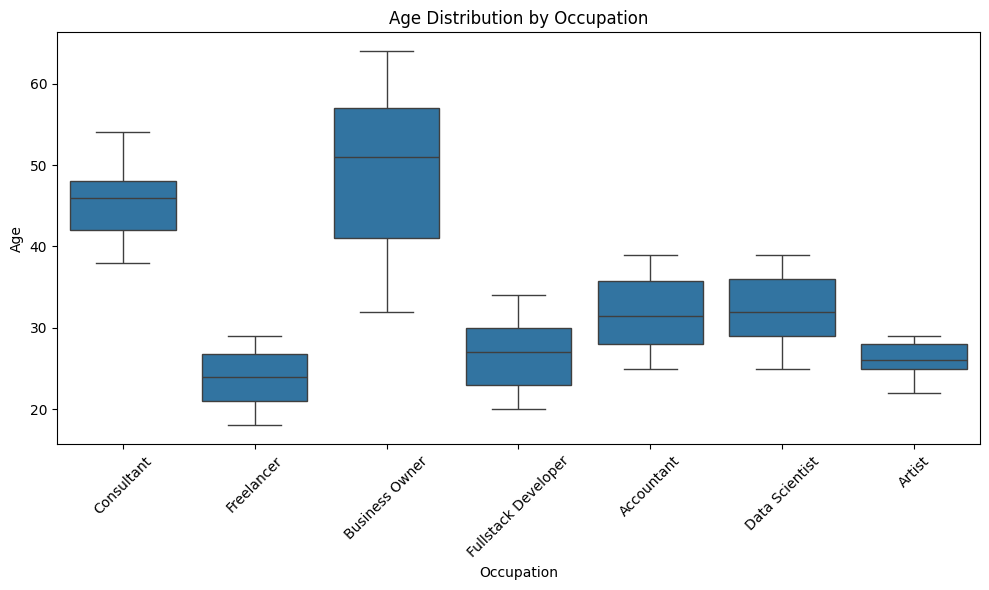

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_valid,
    x='occupation',
    y='age'
)
plt.xticks(rotation=45)
plt.title('Age Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [31]:
df_valid.groupby('occupation')['age'].skew()

occupation
Accountant             0.06
Artist                -0.20
Business Owner        -0.27
Consultant             0.12
Data Scientist         0.05
Freelancer            -0.06
Fullstack Developer    0.01
Name: age, dtype: float64

In [32]:
occ_age_mean = (
    df_cust[(df_cust['age'] >= 18) & (df_cust['age'] <= 80)]
    .groupby('occupation')['age']
    .mean()
)
occ_age_mean

occupation
Accountant            31.86
Artist                26.03
Business Owner        49.48
Consultant            45.47
Data Scientist        32.18
Freelancer            23.87
Fullstack Developer   26.75
Name: age, dtype: float64

In [33]:
df_cust.loc[(df_cust['age'] < 18) | (df_cust['age'] > 80), 'age'] = df_cust['occupation'].map(occ_age_mean)   

Age values deemed invalid were replaced with the **mean** age for each occupation, as skewness was minimal. This preserved occupation-specific patterns — for example, Freelancers averaged 23.87 years, while Business Owners averaged 49.48 years.


In [34]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [35]:
df_cust['age'].describe()

count   1,000.00
mean       35.53
std        12.27
min        18.00
25%        26.00
50%        32.00
75%        44.25
max        64.00
Name: age, dtype: float64

 **Visualization** 

In [36]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married
1,2,Anjali Pandey,Female,47.00,City,Consultant,"7,82,064.00",Single
2,3,Aaryan Chauhan,Male,21.00,City,Freelancer,"2,68,536.00",Married
3,4,Rudra Bali,Male,24.00,Rural,Freelancer,"4,02,756.00",Married
4,5,Advait Malik,Male,48.00,City,Consultant,"4,72,872.00",Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.00,City,Freelancer,"5,61,108.00",Married
996,997,Aarav Dhawan,Male,55.00,City,Business Owner,"34,80,732.00",Single
997,998,Rehan Jha,Male,29.00,City,Fullstack Developer,"16,69,692.00",Married
998,999,Amara Rathore,Female,47.00,City,Business Owner,"31,35,585.00",Married


In [37]:
bins=[17,25,48,65]
bin_labels=['18-25','26-48','49-65']

In [38]:
df_cust['age_group']=pd.cut(df_cust['age'],bins=bins,labels=bin_labels)

In [39]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65
1,2,Anjali Pandey,Female,47.00,City,Consultant,"7,82,064.00",Single,26-48
2,3,Aaryan Chauhan,Male,21.00,City,Freelancer,"2,68,536.00",Married,18-25
3,4,Rudra Bali,Male,24.00,Rural,Freelancer,"4,02,756.00",Married,18-25
4,5,Advait Malik,Male,48.00,City,Consultant,"4,72,872.00",Married,26-48


In [40]:
pie_data=df_cust['age_group'].value_counts(normalize=True)*100
pie_data

age_group
26-48   56.70
18-25   24.60
49-65   18.70
Name: proportion, dtype: float64

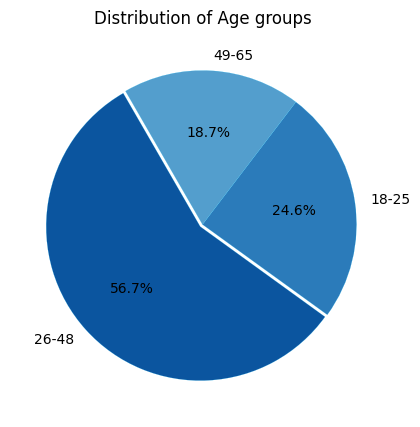

In [41]:
plt.rcParams['figure.figsize']=[6,5]
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f%%',
        startangle=120,explode=[0.02,0,0],
        colors=sns.color_palette('Blues_r'),
        wedgeprops={'edgecolor': 'deepskyblue','linewidth':0.1})
plt.title('Distribution of Age groups')
plt.show()

In [42]:
cust_loc_gen=df_cust.groupby(['location','gender']).size().unstack()
cust_loc_gen

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


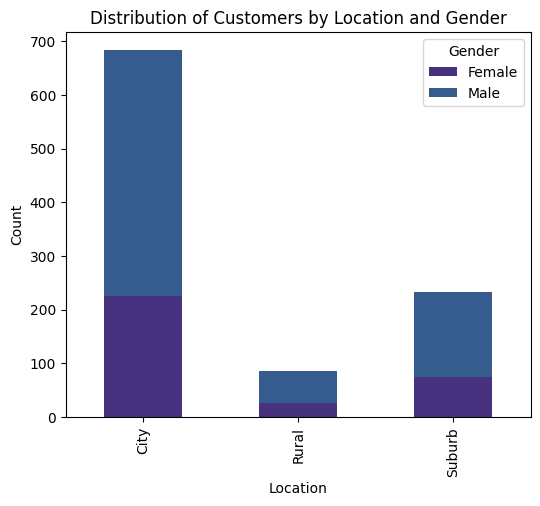

In [43]:
plt.rcParams['figure.figsize']=[6,5]
cust_loc_gen.plot(kind='bar',stacked=True, color=sns.color_palette('viridis'))
plt.title('Distribution of Customers by Location and Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [44]:
df_cust.to_csv('cust_cleaned.csv', index=False)

#### **Exploring `credit_score` table**

In [45]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.59,"19,571.00",0.00,"40,000.00"
1,2,587,0.11,"1,61,644.00",2.00,"1,250.00"
2,3,544,0.85,513.00,4.00,"1,000.00"
3,4,504,0.34,224.00,2.00,"1,000.00"
4,5,708,0.59,"18,090.00",2.00,"40,000.00"


In [46]:
df_cs.shape # potential duplicates since there are only 1000 customers

(1004, 6)

In [47]:
df_cust.shape

(1000, 9)

In [48]:
df_cs['cust_id'].nunique()

1000

In [49]:
df_cs['cust_id'].duplicated().sum()

4

In [50]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.11,33.00,3.00,500.00
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.11,37.00,0.00,500.00
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.19,"4,392.00",1.00,"40,000.00"
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.86,266.00,2.00,500.00


In [51]:
df_cs_clean_1=df_cs.drop_duplicates(subset='cust_id',keep='last').reset_index(drop=True)

In [52]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.59,"19,571.00",0.00,"40,000.00"
1,2,587,0.11,"1,61,644.00",2.00,"1,250.00"
2,3,544,0.85,513.00,4.00,"1,000.00"
3,4,504,0.34,224.00,2.00,"1,000.00"
4,5,708,0.59,"18,090.00",2.00,"40,000.00"


In [53]:
df_cs_clean_1.shape # removed duplicates

(1000, 6)

**Checking NULL Values**

In [54]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [55]:
df_cs_clean_1[df_cs_clean_1['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.56,"9,187.00",2.00,NaN
35,36,790,0.11,"4,261.00",1.00,NaN
37,38,514,0.30,238.00,2.00,NaN
45,46,761,0.60,"24,234.00",2.00,NaN
64,65,734,0.47,"13,631.00",0.00,NaN
...,...,...,...,...,...,...
908,909,479,0.49,320.00,3.00,NaN
927,928,311,0.83,316.00,2.00,NaN
944,945,526,0.27,227.00,1.00,NaN
950,951,513,0.18,131.00,3.00,NaN


In [56]:
df_cs_clean_1['credit_limit'].value_counts()

credit_limit
500.00       229
60,000.00    186
40,000.00    137
1,500.00     100
1,000.00      90
750.00        76
1,250.00      75
20,000.00     42
Name: count, dtype: int64

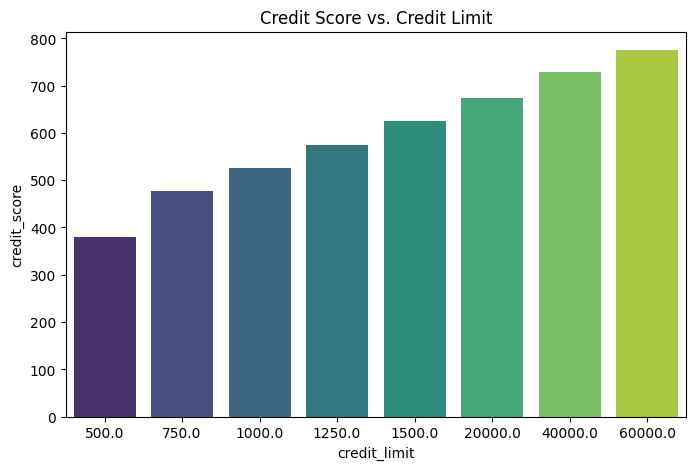

In [57]:
plt.rcParams['figure.figsize']=[8,5]
sns.barplot(df_cs_clean_1,x='credit_limit',y='credit_score',ci=0,palette='viridis')
plt.title('Credit Score vs. Credit Limit')
plt.show()

The data reveals a strong linear relationship between credit score and credit limit—higher credit scores are consistently associated with higher credit limits.

In [58]:
df_cs_clean_1['credit_score'].describe()

count   1,000.00
mean      589.18
std       152.28
min       300.00
25%       460.00
50%       601.50
75%       738.00
max       799.00
Name: credit_score, dtype: float64

In [59]:
# grouping credit_scores
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]
bin_labels

['300-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [60]:
df_cs_clean_1['credit_score_range']=pd.cut(df_cs_clean_1['credit_score'],
                                           bins=bin_ranges,labels=bin_labels,
                                           right=False)

In [61]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.59,"19,571.00",0.00,"40,000.00",700-749
1,2,587,0.11,"1,61,644.00",2.00,"1,250.00",550-599
2,3,544,0.85,513.00,4.00,"1,000.00",500-549
3,4,504,0.34,224.00,2.00,"1,000.00",500-549
4,5,708,0.59,"18,090.00",2.00,"40,000.00",700-749


In [62]:
crd_lmt_mode=df_cs_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x:x.mode()[0])
crd_lmt_mode

credit_score_range
300-449      500.00
450-499      750.00
500-549    1,000.00
550-599    1,250.00
600-649    1,500.00
650-699   20,000.00
700-749   40,000.00
750-799   60,000.00
Name: credit_limit, dtype: float64

In [63]:
df_cs_clean_1['credit_score_range']=df_cs_clean_1['credit_score_range'].astype(str)

In [64]:
df_cs_clean_1['credit_limit'].fillna(df_cs_clean_1['credit_score_range'].map(crd_lmt_mode),inplace=True)

To address missing values in the credit limit, the data was segmented into bins based on credit score. Within each bin, missing credit limit values were imputed using the mode. Binning was chosen because visual inspection showed that credit limit values tend to repeat at discrete levels across score ranges, making mode imputation an effective strategy.

In [65]:
df_cs_clean_1.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [66]:
df_cs_clean_1.shape

(1000, 7)

In [67]:
df_cs_clean_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,500.50,589.18,0.50,"9,683.60",1.96,"19,733.75"
std,288.82,152.28,0.23,"25,255.89",1.41,"24,717.44"
min,1.00,300.00,0.10,33.00,0.00,500.00
25%,250.75,460.00,0.29,221.00,1.00,750.00
50%,500.50,601.50,0.49,550.00,2.00,"1,500.00"
75%,750.25,738.00,0.70,"11,819.50",3.00,"40,000.00"
max,"1,000.00",799.00,0.90,"2,09,901.00",4.00,"60,000.00"


The maximum credit limit is 60,000 so an outstanding debt of 209,901 is not possible and likely indicates a data quality issue.

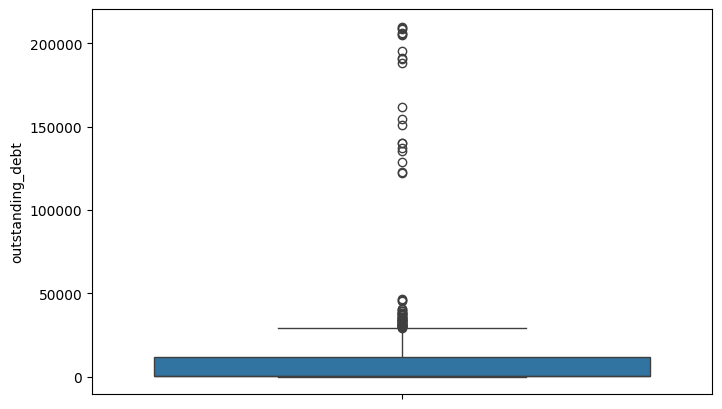

In [68]:
sns.boxplot(df_cs_clean_1['outstanding_debt'])
plt.show()

In [69]:
df_cs_clean_1[df_cs_clean_1['outstanding_debt']>df_cs_clean_1['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.11,"1,61,644.00",2.00,"1,250.00",550-599
19,20,647,0.44,"2,05,014.00",3.00,"1,500.00",600-649
25,26,758,0.25,"1,90,838.00",2.00,"60,000.00",750-799
38,39,734,0.57,"1,22,758.00",3.00,"40,000.00",700-749
93,94,737,0.74,"1,37,058.00",2.00,"40,000.00",700-749
204,205,303,0.36,"1,87,849.00",0.00,500.00,300-449
271,272,703,0.45,"1,54,568.00",1.00,"40,000.00",700-749
301,302,722,0.61,"1,22,402.00",4.00,"40,000.00",700-749
330,331,799,0.36,"2,08,898.00",4.00,"60,000.00",750-799
350,351,320,0.29,"1,50,860.00",0.00,500.00,300-449


Outstanding debt **may occasionally exceed the credit limit** due to interest, fees, or specific transactions, but substantial overages (over the credit limit) are rare and typically result from errors, anomalies, or unauthorized activity. To ensure consistency, we cap outstanding debt at the credit limit, representing the maximum allowable liability for a credit line.


In [70]:
df_cs_clean_1.loc[df_cs_clean_1['outstanding_debt'] > df_cs_clean_1['credit_limit'], 'outstanding_debt'] = df_cs_clean_1['credit_limit']     

In [71]:
df_cs_clean_1[df_cs_clean_1['outstanding_debt']>df_cs_clean_1['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [72]:
df_cs_clean_1.to_csv('crd_score_cleaned.csv', index=False)

**Merging customer and credit_score dataframes for analysis**

In [73]:
df_merged=pd.merge(df_cust,df_cs_clean_1,on='cust_id',how='inner')

In [74]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749
1,2,Anjali Pandey,Female,47.00,City,Consultant,"7,82,064.00",Single,26-48,587,0.11,"1,250.00",2.00,"1,250.00",550-599
2,3,Aaryan Chauhan,Male,21.00,City,Freelancer,"2,68,536.00",Married,18-25,544,0.85,513.00,4.00,"1,000.00",500-549
3,4,Rudra Bali,Male,24.00,Rural,Freelancer,"4,02,756.00",Married,18-25,504,0.34,224.00,2.00,"1,000.00",500-549
4,5,Advait Malik,Male,48.00,City,Consultant,"4,72,872.00",Married,26-48,708,0.59,"18,090.00",2.00,"40,000.00",700-749


In [75]:
df_merged.shape

(1000, 15)

In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   name                            1000 non-null   object  
 2   gender                          1000 non-null   object  
 3   age                             1000 non-null   float64 
 4   location                        1000 non-null   object  
 5   occupation                      1000 non-null   object  
 6   annual_income                   1000 non-null   float64 
 7   marital_status                  1000 non-null   object  
 8   age_group                       1000 non-null   category
 9   credit_score                    1000 non-null   int64   
 10  credit_utilisation              1000 non-null   float64 
 11  outstanding_debt                1000 non-null   float64 
 12  credit_inquiries_last

In [77]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 
                  'annual_income', 'age']

In [78]:
corr_matrix=df_merged[numerical_cols].corr()

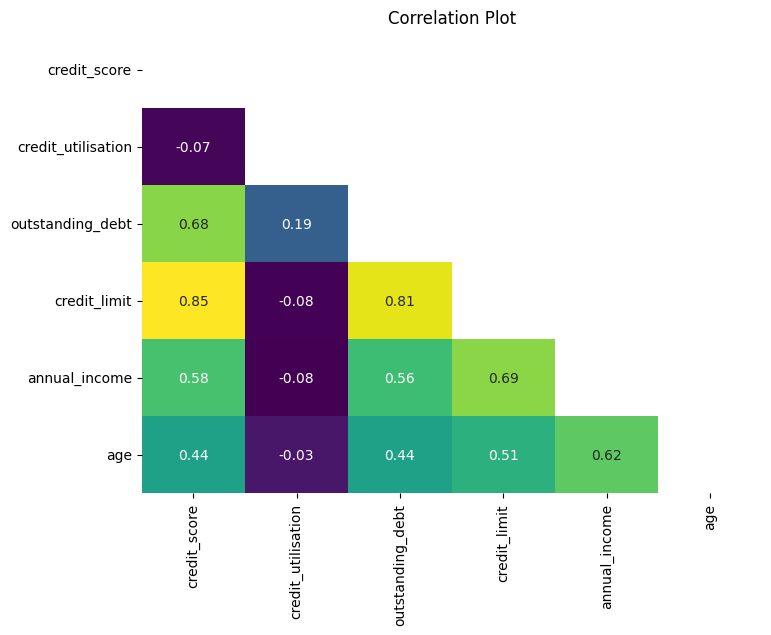

In [79]:
plt.rcParams['figure.figsize']=[8,6]
sns.heatmap(corr_matrix,annot=True,cbar=False,cmap='viridis',fmt='.2f',mask=np.triu(corr_matrix))
plt.title('Correlation Plot')
plt.show()

**Inferences:**

1. **Credit score** strongly correlates with **credit limit** (0.85), **outstanding debt** (0.68), and **annual income** (0.58).
2. **Credit limit** is also highly correlated with **outstanding debt** (0.81) and **annual income** (0.68).
3. **Credit utilisation** shows weak correlations, mostly negative and close to zero.
4. **Annual income** moderately correlates with **age** (0.62).
5. **Age** has moderate positive correlation with most variables, excluding **credit utilisation**.
6. **credit\_score** appears to be a key variable, influenced by income, debt, and credit limit.


#### **Exploring `Transactions` table**

In [80]:
df_txn.shape

(500000, 7)

In [81]:
df_txn.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [82]:
df_txn.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [83]:
df_txn['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [84]:
df_txn['platform'].describe()

count     495059
unique         7
top       Amazon
freq      151443
Name: platform, dtype: object

In [85]:
df_txn['platform'].value_counts(normalize=True)*100

platform
Amazon     30.59
Flipkart   24.78
Alibaba    14.86
Meesho     14.80
Shopify     7.96
Cred        5.00
Ebay        2.01
Name: proportion, dtype: float64

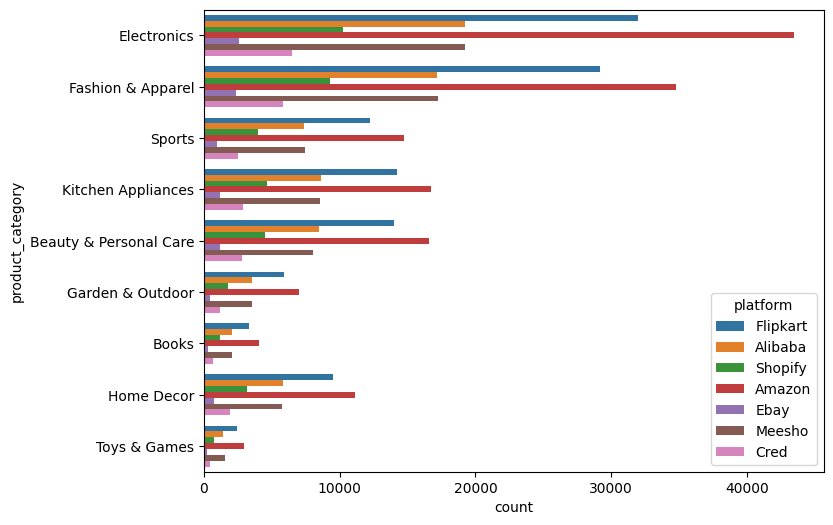

In [86]:
sns.countplot(df_txn,y='product_category',hue='platform')
plt.show()

#### **Null value imputation**

In [87]:
df_txn['platform']=df_txn['platform'].fillna(df_txn['platform'].mode()[0])

The missing values in the 'platform' column were imputed using the mode, as it is a categorical variable. **Amazon**, being the most frequent platform overall (accounting for 151,443 out of 495,059 records), was chosen as the mode. This choice is further supported by the visual evidence in the chart, which shows that Amazon consistently dominates across multiple product categories. Therefore, imputing with Amazon is both statistically and contextually appropriate.


In [88]:
df_txn.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [89]:
df_txn.describe()

,tran_id,cust_id,tran_amount
count,"5,00,000.00","5,00,000.00","5,00,000.00"
mean,"2,50,000.50",501.40,"3,225.21"
std,"1,44,337.71",288.64,"13,098.74"
min,1.00,1.00,0.00
25%,"1,25,000.75",252.00,64.00
50%,"2,50,000.50",502.00,141.00
75%,"3,75,000.25",752.00,397.00
max,"5,00,000.00","1,000.00","69,999.00"


**Anomalies & Outlier Treatment**

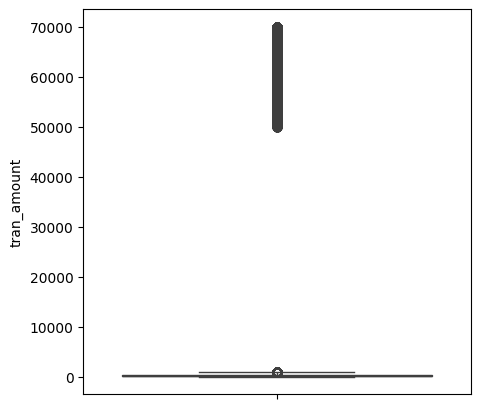

In [90]:
plt.rcParams['figure.figsize']=[5,5]
sns.boxplot(df_txn['tran_amount'])
plt.show()

Extreme outliers were identified using the boxplot, and the `.describe()` summary revealed a minimum transaction amount of 0, which is not realistic. These anomalies indicate potential data quality issues that require correction.


In [91]:
bins = [0, 1000, 70000]
labels = ['(0, 1000]', '(1000, 70000]']

In [92]:
df_txn['amount_bins'] = pd.cut(df_txn['tran_amount'], bins=bins, labels=labels, include_lowest=False)

In [93]:
data = df_txn['amount_bins'].value_counts().sort_index()
data

amount_bins
(0, 1000]        470266
(1000, 70000]     25000
Name: count, dtype: int64

In [94]:
colors = ['#7ba8d8', '#e0a589']

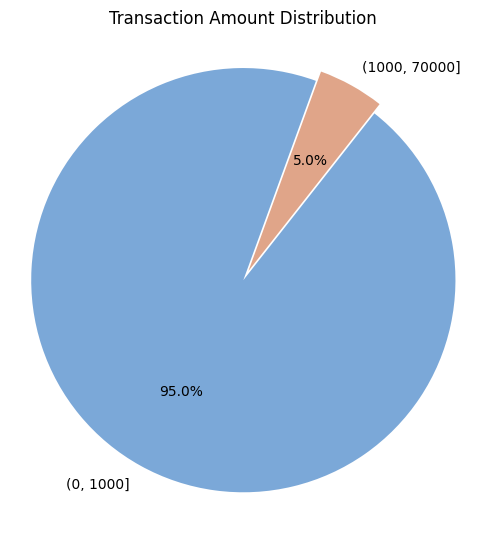

In [95]:
plt.rcParams['figure.figsize']=[5,5.5]
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=70,explode=[0,0.05],colors=colors)
plt.title('Transaction Amount Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [96]:
amt=df_txn[df_txn['tran_amount']>1000].sort_values('tran_amount',ascending=True)

In [97]:
bins = [50000, 55000, 60000, float('inf')]
labels = ['50000-55000', '55000-60000', '60000+']

In [98]:
amt['amt_grp']=pd.cut(amt['tran_amount'], bins=bins, labels=labels, include_lowest=True)

In [99]:
amt_grp_counts = amt['amt_grp'].value_counts()

In [100]:
amt_grp_counts

amt_grp
60000+         12568
55000-60000     6298
50000-55000     6134
Name: count, dtype: int64

In [101]:
colors = ["#FFB347", "#FFDAC1", "#FDFD96"] 

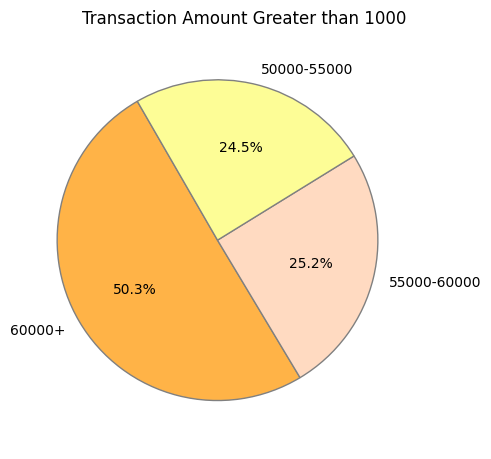

In [102]:
plt.rcParams['figure.figsize']=[5,4.7]
plt.pie(amt_grp_counts, labels=amt_grp_counts.index, 
        autopct='%1.1f%%',startangle=120,
        colors=colors, wedgeprops={'edgecolor': 'grey'})
plt.title('Transaction Amount Greater than 1000',loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [103]:
df_txn_1=df_txn.copy()

In [104]:
temp = df_txn_1[df_txn_1['tran_amount'] > 0] 

In [105]:
Q1, Q3 = temp['tran_amount'].quantile([0.25, 0.75])

In [106]:
IQR=Q3-Q1

`2.5` IQR for conservative outlier detection due to the data's extreme right skew, to avoid falsely flagging legitimate high-value transactions. Since outliers are imputed with product_category means, being overly aggressive would distort natural price variations.

In [107]:
lower_bound=Q1-2.5*IQR 
upper_bound=Q3+2.5*IQR
lower_bound,upper_bound

(-771.5, 1238.5)

In [108]:
df_trans_amt_clean=df_txn_1[(df_txn_1['tran_amount']<=upper_bound) & (df_txn_1['tran_amount']!=0)]

In [109]:
df_trans_amt_clean.shape

(470266, 8)

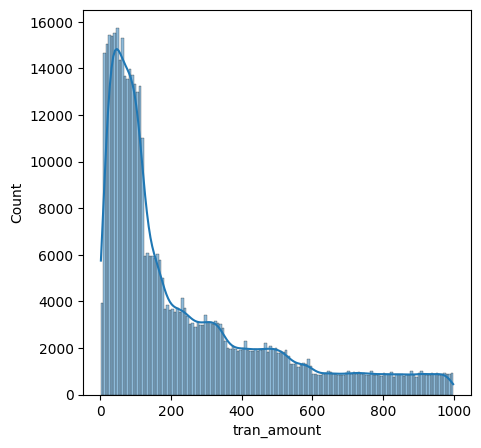

In [110]:
plt.rcParams['figure.figsize']=[5,5]  
sns.histplot(df_trans_amt_clean['tran_amount'],kde=True)
plt.show()

In [111]:
df_trans_amt_clean.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe,"(0, 1000]"
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card,"(0, 1000]"
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe,"(0, 1000]"
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay,"(0, 1000]"
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking,"(0, 1000]"


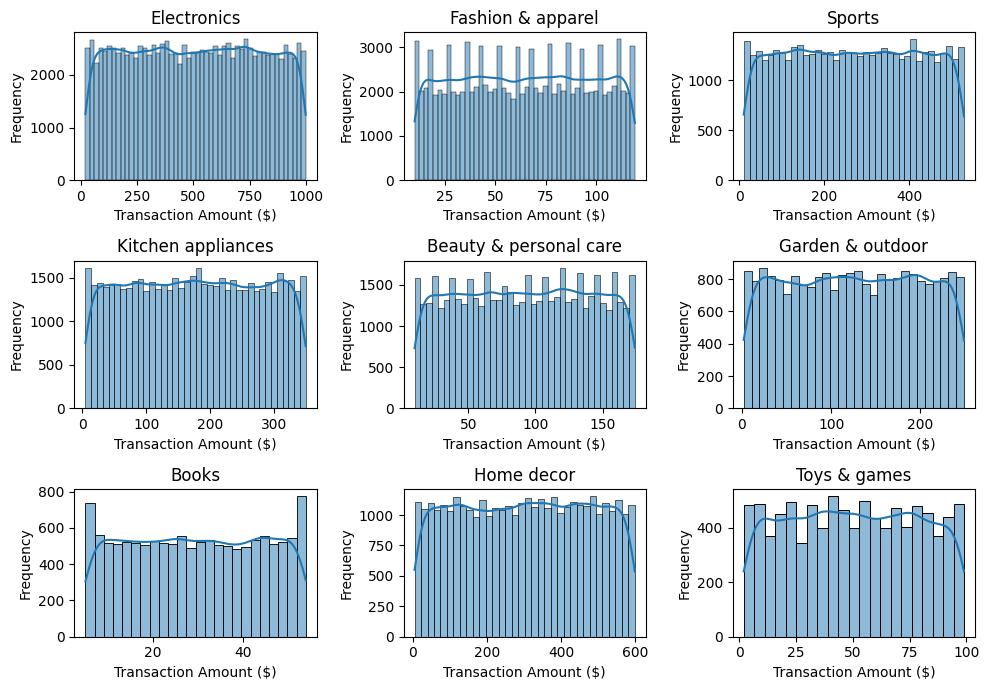

In [112]:
plt.rcParams['figure.figsize']=[10,7]  
categorical_columns = df_trans_amt_clean['product_category'].unique()
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, idx) 
    subset = df_trans_amt_clean[df_trans_amt_clean['product_category'] == col]['tran_amount']
    sns.histplot(data=subset, kde=True)  
    plt.title(col.capitalize())
    plt.xlabel('Transaction Amount ($)')
    plt.ylabel('Frequency')
plt.tight_layout()

In [113]:
categorical_columns = df_trans_amt_clean['product_category'].unique()

for col in categorical_columns:
    skew_value = df_trans_amt_clean[df_trans_amt_clean['product_category'] == col]['tran_amount'].skew()
    print(f"Skewness for {col}: {skew_value:.2f}")

Skewness for Electronics: 0.00
Skewness for Fashion & Apparel: -0.00
Skewness for Sports: 0.00
Skewness for Kitchen Appliances: 0.00
Skewness for Beauty & Personal Care: -0.01
Skewness for Garden & Outdoor: -0.01
Skewness for Books: -0.00
Skewness for Home Decor: -0.01
Skewness for Toys & Games: 0.01


In [114]:
amt_mean=df_trans_amt_clean.groupby('product_category')['tran_amount'].mean()
amt_mean

product_category
Beauty & Personal Care    92.17
Books                     29.55
Electronics              508.49
Fashion & Apparel         64.55
Garden & Outdoor         125.63
Home Decor               302.49
Kitchen Appliances       176.77
Sports                   269.18
Toys & Games              50.33
Name: tran_amount, dtype: float64

In [115]:
df_txn_2=df_txn_1.copy()

In [116]:
df_txn_2.loc[ df_txn_2['tran_amount']>upper_bound,'tran_amount'] = df_txn_2['product_category'].map(amt_mean)    

In [117]:
df_txn_2[df_txn_2['tran_amount']>upper_bound]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins


Outlier transaction amounts exceeding the upper bound were imputed using the mean within each product category.
This was justified by the near-zero skewness across categories, indicating symmetric distributions with no significant outliers.


In [118]:
df_trans_zero = df_txn_2[df_txn_2['tran_amount']==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
120,121,440,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
141,142,839,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
517,518,147,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
533,534,891,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
586,587,108,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
...,...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0.00,Amazon,Electronics,Credit Card,NaN
499494,499495,295,2023-09-05,0.00,Amazon,Electronics,Credit Card,NaN
499708,499709,141,2023-09-05,0.00,Amazon,Electronics,Credit Card,NaN
499928,499929,4,2023-09-05,0.00,Amazon,Electronics,Credit Card,NaN


In [119]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
120,121,440,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
141,142,839,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
517,518,147,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
533,534,891,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN
586,587,108,2023-01-01,0.00,Amazon,Electronics,Credit Card,NaN


In [120]:
df_trans_zero[["platform", "product_category", "payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [121]:
df_trans_zero[['product_category', 'platform','payment_type']].drop_duplicates() # checking unique

,product_category,platform,payment_type
120,Electronics,Amazon,Credit Card


In [122]:
df_txn_grpd = df_txn_2[(df_txn_2['product_category']=='Electronics') & 
                       (df_txn_2['platform']=='Amazon') & 
                       (df_txn_2['payment_type']=='Credit Card')]        

In [123]:
df_txn_grpd.shape

(15637, 8)

In [124]:
valid_txns = df_txn_grpd[df_txn_grpd['tran_amount']>0]['tran_amount']

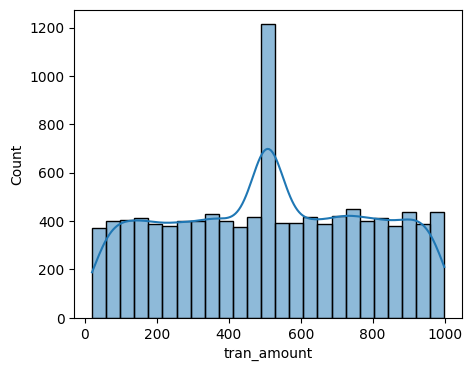

In [125]:
plt.rcParams['figure.figsize']=[5,4]  
sns.histplot(valid_txns,kde=True)
plt.show()

In [126]:
valid_txns.skew()

-0.013211818234750792

In [127]:
mean_to_replace = round(valid_txns.mean(),2)
mean_to_replace

514.27

In [128]:
df_txn_3 = df_txn_2.copy()

In [129]:
df_txn_3['tran_amount'].replace(0,mean_to_replace,inplace=True)

Replaced zero transaction amounts with the mean for the 'Electronics - Amazon - Credit Card' group, as all zeroes belonged to this category. Mean imputation was appropriate given the near-symmetric distribution (skew = -0.0132), as shown in the histogram.

**Visualization**

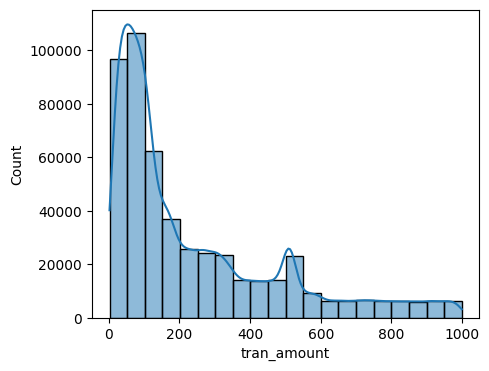

In [130]:
sns.histplot(df_txn_3['tran_amount'],kde=1,bins=20)
plt.show()

In [131]:
df_txn_3['tran_amount'].describe()

count   5,00,000.00
mean         240.27
std          241.21
min            2.00
25%           64.55
50%          133.00
75%          349.00
max          999.00
Name: tran_amount, dtype: float64

In [132]:
df_txn_3.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,705,2023-01-01,63.00,Flipkart,Electronics,Phonepe,"(0, 1000]"
1,2,385,2023-01-01,99.00,Alibaba,Fashion & Apparel,Credit Card,"(0, 1000]"
2,3,924,2023-01-01,471.00,Shopify,Sports,Phonepe,"(0, 1000]"
3,4,797,2023-01-01,33.00,Shopify,Fashion & Apparel,Gpay,"(0, 1000]"
4,5,482,2023-01-01,68.00,Amazon,Fashion & Apparel,Net Banking,"(0, 1000]"


In [133]:
sorted_order = df_txn_3['payment_type'].value_counts().sort_values(ascending=False).index
sorted_order

Index(['Phonepe', 'Credit Card', 'Gpay', 'Debit Card', 'Net Banking', 'Cash'], dtype='object', name='payment_type')

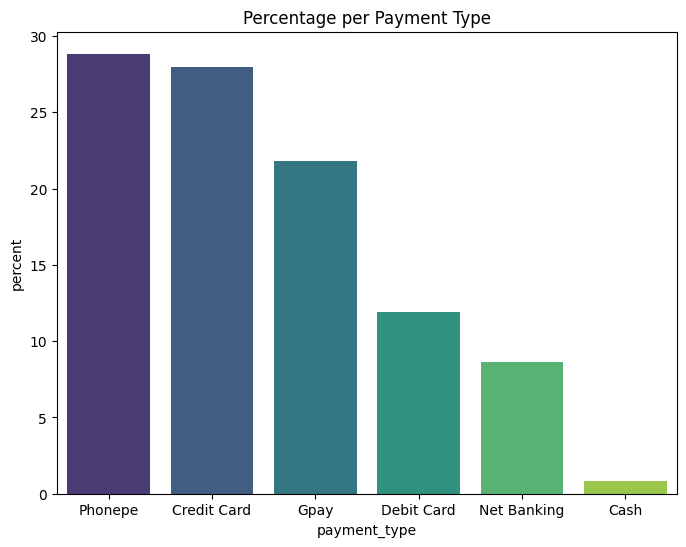

In [134]:
plt.rcParams['figure.figsize']=[8,6] 
sns.countplot(x=df_txn_3['payment_type'], palette='viridis',stat='percent',order=sorted_order)
plt.title('Percentage per Payment Type')
plt.show()

In [135]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749
1,2,Anjali Pandey,Female,47.00,City,Consultant,"7,82,064.00",Single,26-48,587,0.11,"1,250.00",2.00,"1,250.00",550-599
2,3,Aaryan Chauhan,Male,21.00,City,Freelancer,"2,68,536.00",Married,18-25,544,0.85,513.00,4.00,"1,000.00",500-549
3,4,Rudra Bali,Male,24.00,Rural,Freelancer,"4,02,756.00",Married,18-25,504,0.34,224.00,2.00,"1,000.00",500-549
4,5,Advait Malik,Male,48.00,City,Consultant,"4,72,872.00",Married,26-48,708,0.59,"18,090.00",2.00,"40,000.00",700-749


In [136]:
df_merged1=pd.merge(df_merged,df_txn_3,on='cust_id',how='inner')

In [137]:
df_merged1.shape

(500000, 22)

In [138]:
pd.set_option('display.max_columns',None)

In [139]:
df_merged1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
0,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1283,2023-01-01,30.00,Shopify,Fashion & Apparel,Net Banking,"(0, 1000]"
1,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1382,2023-01-01,96.00,Amazon,Sports,Debit Card,"(0, 1000]"
2,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1521,2023-01-01,86.00,Meesho,Garden & Outdoor,Gpay,"(0, 1000]"
3,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1576,2023-01-01,149.00,Amazon,Beauty & Personal Care,Phonepe,"(0, 1000]"
4,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1757,2023-01-01,37.00,Flipkart,Fashion & Apparel,Credit Card,"(0, 1000]"


**Feature Distribution Across Age Groups**

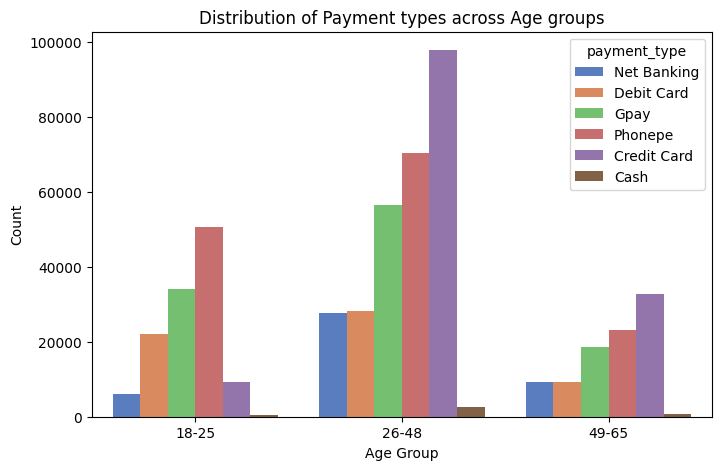

In [140]:
plt.rcParams['figure.figsize']=[8,5] 
sns.countplot(x='age_group',hue='payment_type',data=df_merged1,palette='muted')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [141]:
import matplotlib.ticker as mtick

In [142]:
# Group by product category and age group
grouped = df_merged1.groupby(['product_category', 'age_group']).size().reset_index(name='count')
grouped

,product_category,age_group,count
0,Beauty & Personal Care,18-25,18156
1,Beauty & Personal Care,26-48,28429
2,Beauty & Personal Care,49-65,9480
3,Books,18-25,6075
4,Books,26-48,5706
5,Books,49-65,1854
6,Electronics,18-25,37601
7,Electronics,26-48,73017
8,Electronics,49-65,23917
9,Fashion & Apparel,18-25,42375


In [143]:
# Pivot so product_category is index, age_group are columns
pivot_raw = grouped.pivot(
    index='product_category',
    columns='age_group',
    values='count'
).fillna(0)
pivot_raw

age_group,18-25,26-48,49-65
product_category,,,
Beauty & Personal Care,18156,28429,9480
Books,6075,5706,1854
Electronics,37601,73017,23917
Fashion & Apparel,42375,56200,18317
Garden & Outdoor,1229,16902,5513
Home Decor,1196,27863,9296
Kitchen Appliances,1267,42077,14009
Sports,12260,28008,9436
Toys & Games,2434,5545,1838


In [144]:
# For normalized version (percentage across each product category)
pivot_raw = pivot_raw.astype(float) # only values convtd to float
pivot_norm = pivot_raw.div(pivot_raw.sum(axis=1), axis=0)

In [145]:
pivot_norm

age_group,18-25,26-48,49-65
product_category,,,
Beauty & Personal Care,0.32,0.51,0.17
Books,0.45,0.42,0.14
Electronics,0.28,0.54,0.18
Fashion & Apparel,0.36,0.48,0.16
Garden & Outdoor,0.05,0.71,0.23
Home Decor,0.03,0.73,0.24
Kitchen Appliances,0.02,0.73,0.24
Sports,0.25,0.56,0.19
Toys & Games,0.25,0.56,0.19


In [146]:
# Age group colors
age_colors = {
    '18-25': '#B160E8',
    '26-48': '#60B1E8',
    '49-65': '#9B7FED'
}

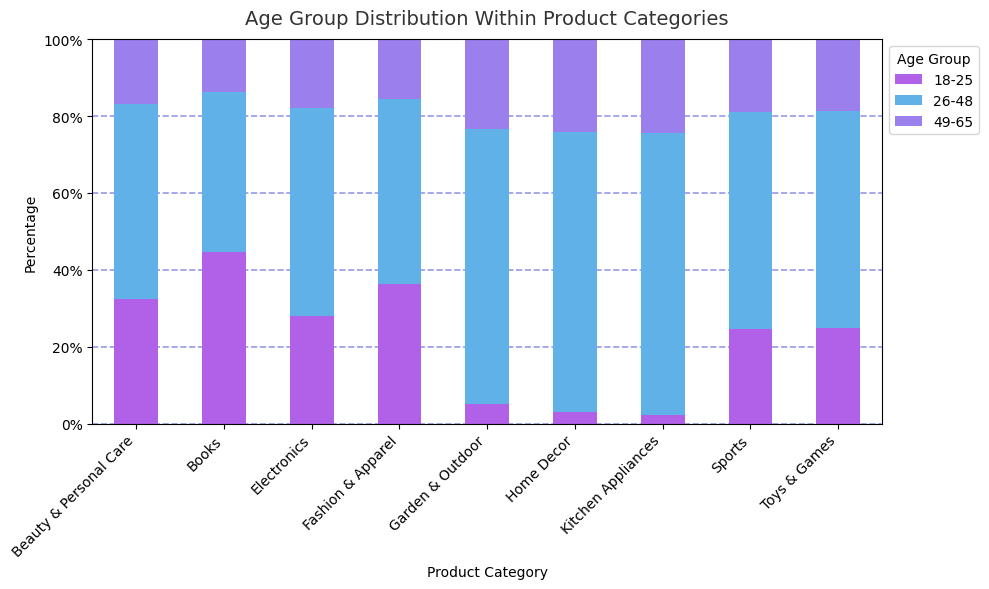

In [147]:
# Plot normalized stacked bar chart
pivot_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[age_colors[col] for col in pivot_norm.columns],
    zorder=2 
)

# Title and axis labels
plt.title(
    'Age Group Distribution Within Product Categories',
    pad=11,
    fontsize=14,
    color='#333333'
)

plt.xlabel('Product Category')
plt.ylabel('Percentage')

# Rotate category labels
plt.xticks(rotation=45, ha='right')

# Format y-axis as percentages and fix y-axis to [0, 1]
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylim(0, 1)

# Legend
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')

# Grid
plt.grid(axis='y', linestyle='--', color='#8A90E8', alpha=0.9, linewidth=1.2, zorder=1)

# Layout adjustments
plt.tight_layout()
plt.show()

In [148]:
credit_card_df = df_merged1[df_merged1['payment_type'] == 'Credit Card']
credit_card_df.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type,amount_bins
4,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,1757,2023-01-01,37.00,Flipkart,Fashion & Apparel,Credit Card,"(0, 1000]"
8,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,5305,2023-01-03,20.00,Flipkart,Beauty & Personal Care,Credit Card,"(0, 1000]"
13,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,6992,2023-01-04,97.00,Amazon,Electronics,Credit Card,"(0, 1000]"
15,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,11804,2023-01-06,574.00,Flipkart,Electronics,Credit Card,"(0, 1000]"
21,1,Manya Acharya,Female,49.48,City,Business Owner,"42,98,532.00",Married,49-65,749,0.59,"19,571.00",0.00,"40,000.00",700-749,23270,2023-01-12,13.00,Amazon,Fashion & Apparel,Credit Card,"(0, 1000]"


In [149]:
sorted_counts = credit_card_df['age_group'].value_counts().sort_values(ascending=True)
sorted_counts

age_group
18-25     9211
49-65    32656
26-48    97911
Name: count, dtype: int64

In [150]:
sorted_order = sorted_counts.index.tolist()
sorted_order

['18-25', '49-65', '26-48']

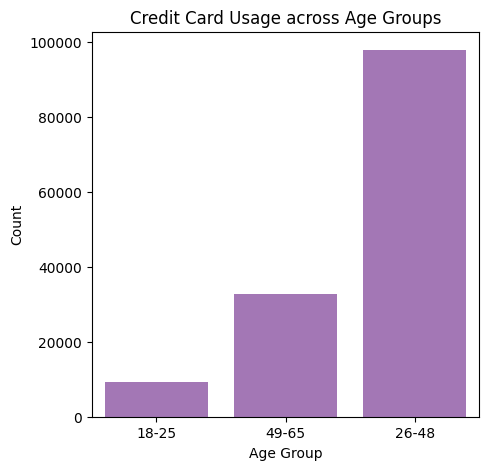

In [151]:
plt.rcParams['figure.figsize'] = [5, 5]
sns.countplot(x='age_group', data=credit_card_df, order=sorted_order,color='#a76dbf')
plt.title('Credit Card Usage across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

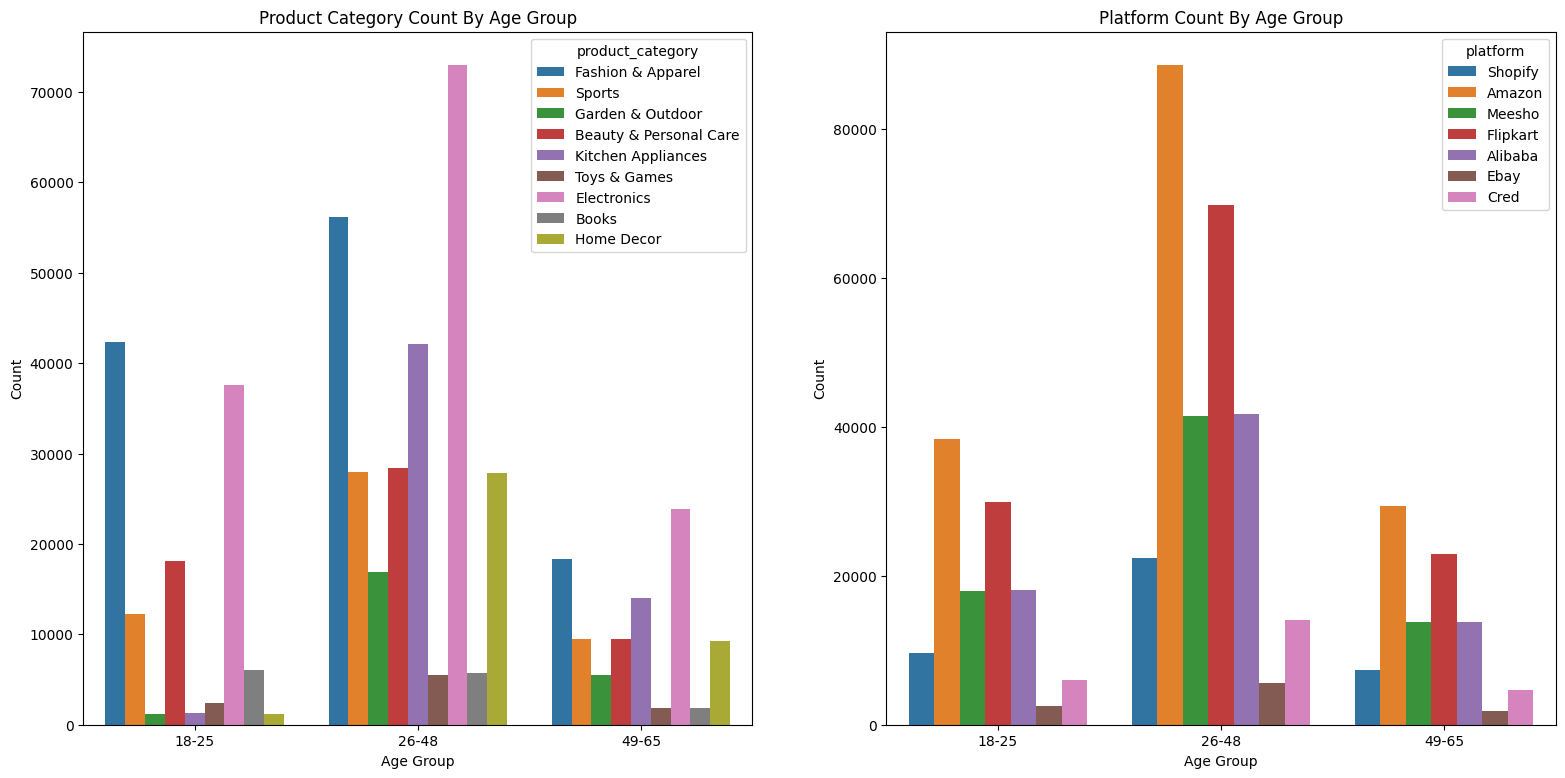

In [152]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(19,9))

sns.countplot(x='age_group', hue='product_category', data=df_merged1, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")

sns.countplot(x='age_group', hue='platform', data=df_merged1, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
plt.show()

**Average Transaction Amount Across Attributes**

In [153]:
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

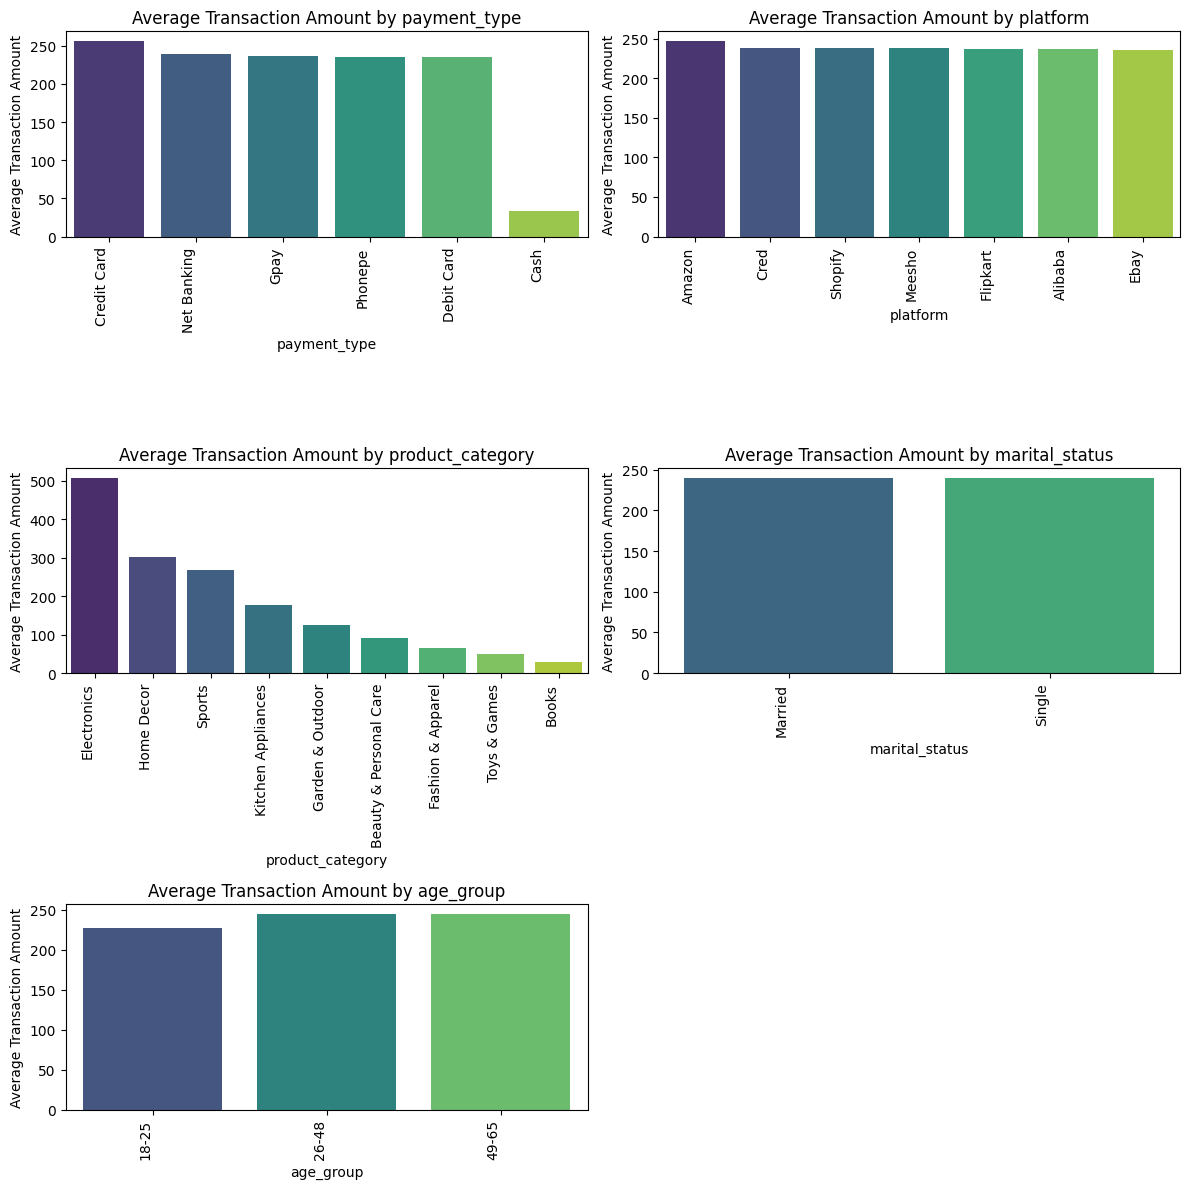

In [154]:
plt.rcParams['figure.figsize']=[12,12]
for i,col in enumerate(cat_cols,1):
    plt.subplot(3,2,i)
    avg_tran_amount_by_category = df_merged1.groupby(col)['tran_amount'].mean().reset_index()
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    sns.barplot(x=col, y='tran_amount', data=sorted_data, ci=None, palette='viridis')
    plt.title(f'Average Transaction Amount by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Transaction Amount')
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [155]:
df_merged1['platform'].value_counts()

platform
Amazon      156384
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [156]:
df_merged1.groupby('platform')['tran_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Alibaba,"73,584.00",236.84,239.76,2.00,64.55,130.00,341.00,999.00
Amazon,"1,56,384.00",246.78,242.26,2.00,64.55,140.00,378.00,999.00
Cred,"24,741.00",238.22,241.13,2.00,64.55,134.00,341.00,999.00
Ebay,"9,944.00",235.51,239.47,2.00,64.55,128.00,340.00,999.00
Flipkart,"1,22,660.00",236.87,240.31,2.00,64.55,129.00,339.00,999.00
Meesho,"73,271.00",238.01,241.74,2.00,64.55,129.00,341.00,999.00
Shopify,"39,416.00",238.14,241.60,2.00,64.55,131.00,340.00,999.00


Although Amazon has a much higher transaction count, the average transaction amount is similar across platforms because the distribution of transaction values — including min, max, median, and quartiles — is nearly identical. This indicates all platforms handle a similar mix of low to high-value transactions, just in different volumes.

**Further Analysis On Age Group**


In [157]:
crdt_crd_txns = df_merged1[df_merged1['payment_type'] == 'Credit Card']

In [158]:
avg_txn = (
    crdt_crd_txns.groupby('age_group')['tran_amount']
    .mean()
    .reset_index()  
)
avg_txn

,age_group,tran_amount
0,18-25,279.85
1,26-48,254.46
2,49-65,254.67


**Inference:**
The 18–25 age group, despite using credit cards less frequently than older groups, records a higher average transaction amount per credit card use. This suggests that while their overall access to credit may be limited, they are likely using credit cards strategically for high-value purchases—possibly to take advantage of promotions, cashback offers, or installment benefits, especially in popular categories like Electronics, Fashion & Apparel, and Beauty & Personal Care.


In [159]:
attributes = ['annual_income', 'credit_limit', 'credit_score']

In [160]:
age_group_metrics = (
    df_merged1.groupby('age_group')[attributes]
    .mean()
    .reset_index()  
)

In [161]:
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,"6,09,769.43","1,137.02",484.71
1,26-48,"17,72,704.00","20,610.30",597.92
2,49-65,"31,35,828.34","41,781.73",701.88


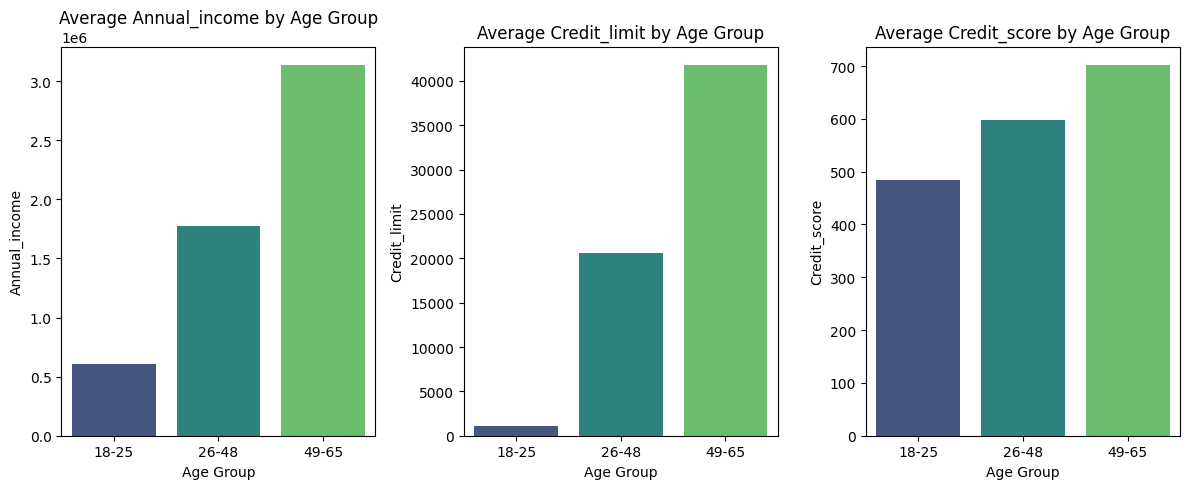

In [162]:
plt.rcParams['figure.figsize'] = [12,5]
for i, col in enumerate(attributes, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='age_group', y=col, data=df_merged1, palette='viridis',ci=False)
    plt.title(f'Average {col.capitalize()} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

In [163]:
df_merged1.to_csv('merged_cleaned.csv')

<h3 align="center" style="font-weight:bold">Finalize Target Market For a Trial Credit Card Launch</h3>

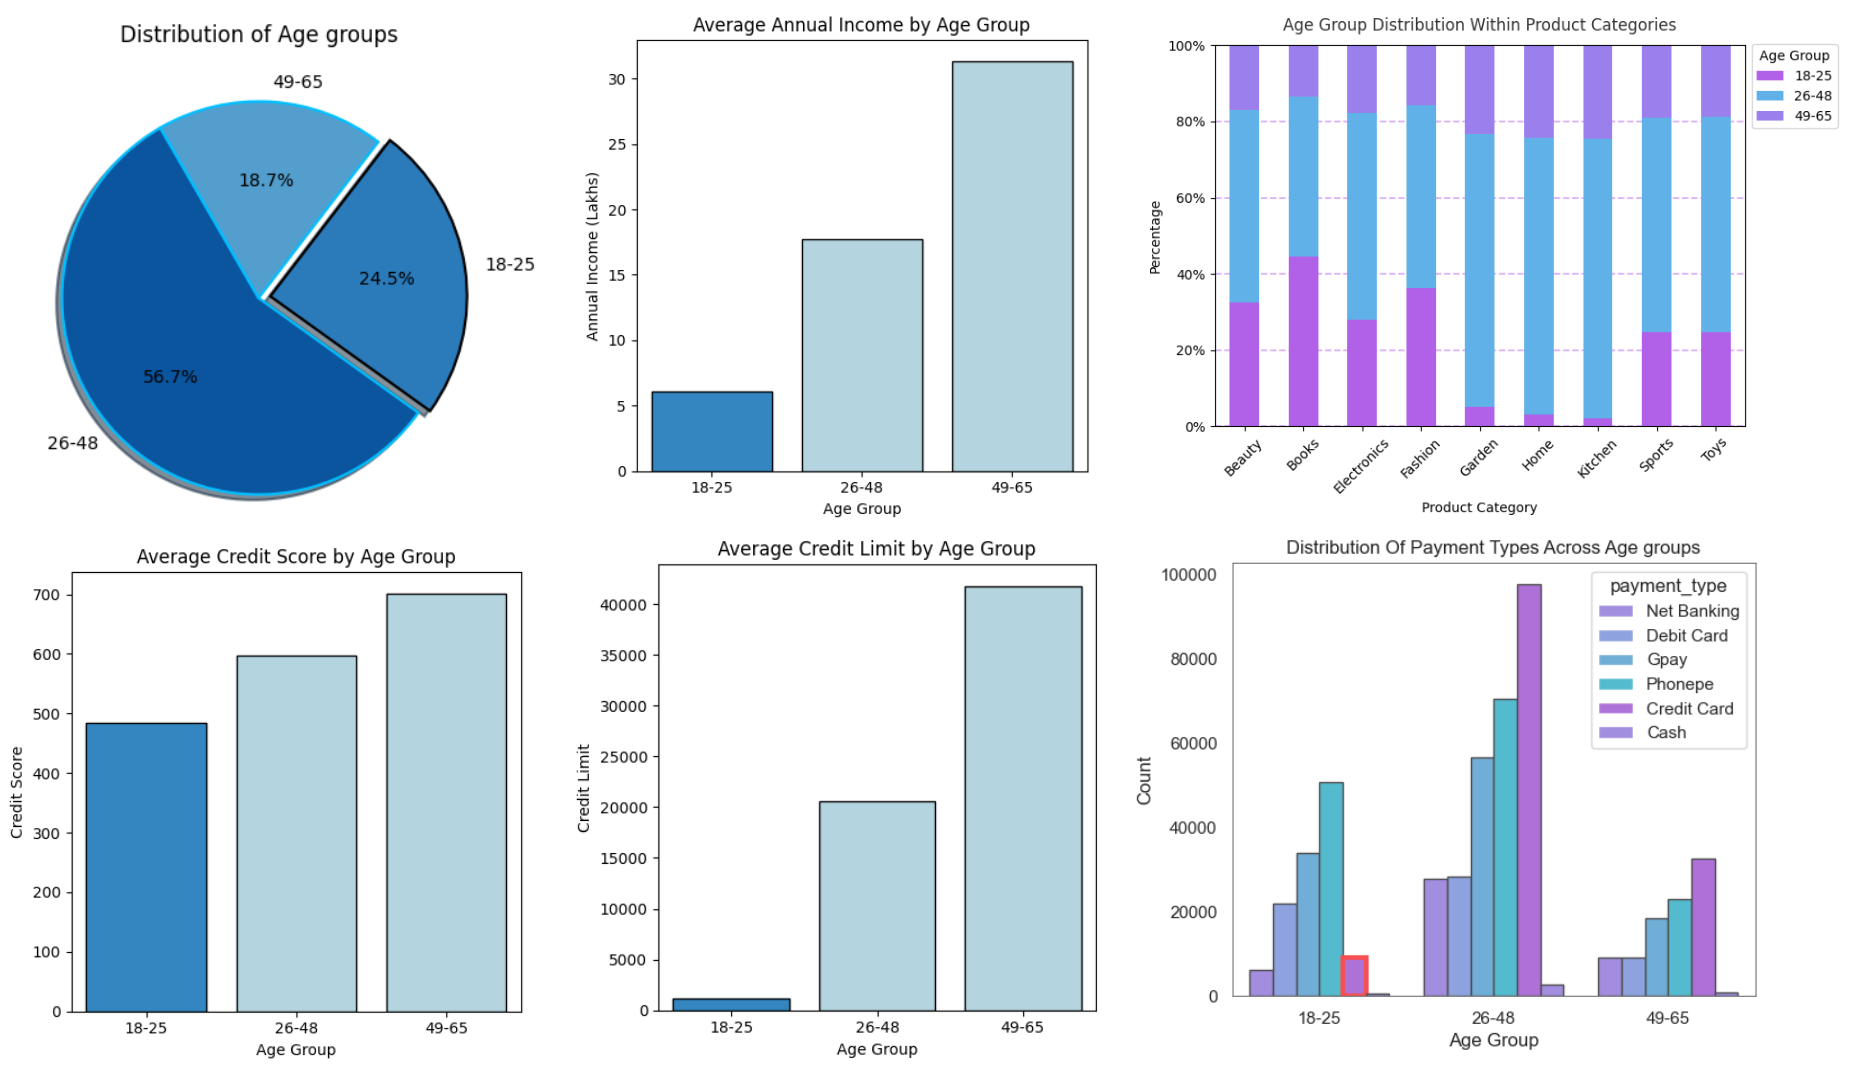

### **Targeting Untapped market**

1. People with age group of 18-25 accounts to ~25% of customer base in the data.
2. The 18-25 age group typically has lower credit scores and limits, reflecting their early stage in credit development.
3. Credit cards are used less frequently by the 18–25 age group, likely due to limited access to credit.
4. However, they tend to use them for high-value purchases in Electronics, Fashion & Apparel, and Beauty & Personal Care—suggesting strategic use to leverage promotions or cashback, and presenting an opportunity for targeted offers to increase adoption.
5. In contrast, older segments (26–48, 49–65) already exhibit high credit card usage. The 49–65 group in particular has well-established card preferences based on years of experience, making them less receptive to new offerings.

---